In [1]:
# 导入一些包

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

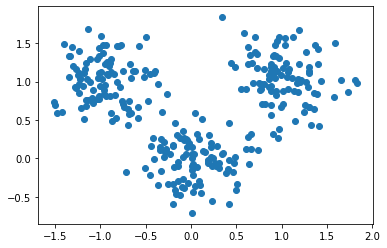

In [3]:
# 模拟出一些数据集出来

#r = np.random.randint(1,100)
r = 4
#print(r)
k = 3
x , y = make_blobs(n_samples = 300,
                   cluster_std = [0.3, 0.3, 0.3],
                   centers = [[0,0],[1,1],[-1,1]]
                   ,random_state = r
                  )
sim_data = pd.DataFrame(x, columns = ['x', 'y'])
sim_data['label'] = y
sim_data.head(5)

datasets = sim_data.copy()

plt.scatter(sim_data['x'], sim_data['y'])

In [4]:
# 首先随机选出一些中心点出来

# 首先将datasets的特征名取出来，这里需要除去label那一列

# 直接用describe的方法将每一列的最小值最大值取出来


In [ ]:
# 尝试的使用np.random.uniform的方法来生成随机值



In [ ]:
# 从x的最大最小中随机生成3个数



In [ ]:
# 从y的最大最小中随机生成3个数



In [5]:
# 使用列表解析式写出一个更加有拓展性的代码



In [ ]:
# 将最后的k_randoms转化成dataframe的格式



In [ ]:
# 上面的都测试好之后，我们就可以把它写出一个函数



In [ ]:
# 取出其中一个质心点，尝试计算每一个点到这个质心点的距离
# 可以尝试使用numpy pandas的广播的特性


# 对数据集来说，去掉label那一列

# 直接使用数据-质心点的方式尝试计算每个点到每个点之间的距离



In [ ]:
# 这个是对其中一个质心点来算出每一个点到质心点的距离
# 这里有k个质心点，我们也可以尝试使用列表解析来完成



In [ ]:
# 当前的d_to_centers是一个list
# 里面元素都是每个数据点到第K个点的距离
# 我们可以尝试将它转换成dataframe的格式

In [ ]:
#这样子我们的点到质心点的距离都计算好了，可以尝试将它封装成函数



In [6]:
# 这个时候点到每一个质心点的距离就出来了
# 需要对每一个点看离哪个质心点最近，从而来更新当前的类别(蔟)
# 对于dataframe来说，可以尝试使用idxmin方法
# 这样就取出当前每一个样本点最近的质心点
# 将当前这个样本点的标签或者类别分给这个最近的质心点

In [7]:
# 当每一个点有一个新的蔟的时候，就可以来计算新的质心点的位置了



In [ ]:
# 那我们有了这个新的质心点之后，就可以尝试计算新的距离了
# 进入下一次迭代

In [8]:
# 将上面的单次迭代写出一个函数



In [ ]:
#创建一个空的SSE_list,用来存SSE的，第一个位置的数为0，无意义，只是方便收敛时最后一个SSE和上一个SSE的对比

#初始化质心点

#开始迭代



In [11]:
# 将所有的代码和函数集合起来
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

def initial_centers(datasets, k = 3):
    cols = datasets.columns
    data_content = datasets.loc[:, cols != 'label']
    range_info = data_content.describe().loc[['min','max']]
    k_randoms = [np.random.uniform(range_info[i]['min'], 
                                   range_info[i]['max'], k) 
                 for i in range_info.columns]
    centers = pd.DataFrame(k_randoms, index = range_info.columns)
    return centers.T

def cal_distant(dataset, centers):
    data = dataset.loc[:, dataset.columns != 'label']
    d_to_centers = [np.power(data - centers.loc[i], 2).sum(axis = 1)
                    for i in centers.index]
    return pd.concat(d_to_centers, axis = 1)

def iterate(dataset, centers):
    d_to_centers = cal_distant(dataset, centers)
    curr_group = d_to_centers.idxmin(axis=1)
    SSE = d_to_centers.min(axis = 1).sum()
    centers = dataset.loc[:, dataset.columns != 'label'].groupby(curr_group).mean()
    return curr_group, SSE, centers

def Kmeans_regular(data, k = 3):
    SSE_list = [0]
    centers = initial_centers(data, k = k)

    while True:
        curr_group, SSE, centers = iterate(data,centers)
        if SSE_list[-1] == SSE:
            break
        SSE_list.append(SSE)
    return curr_group, SSE_list, centers

In [12]:
# 检测一下这个代码是否在其它的数据集下可以运行

from sklearn.datasets import load_iris
data_dict = load_iris()
iris = pd.DataFrame(data_dict.data, columns = data_dict.feature_names)
iris['label'] = data_dict.target

In [13]:
curr_group, SSE_list, centers = Kmeans_regular(iris.copy(), k = 3)

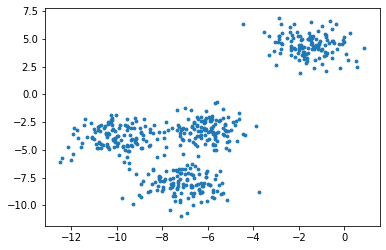

In [14]:
# 再重新创建一个数据集

X, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)
plt.scatter(X[:, 0], X[:, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            #,c=y
           )
data = pd.DataFrame(X)
data['label'] = y

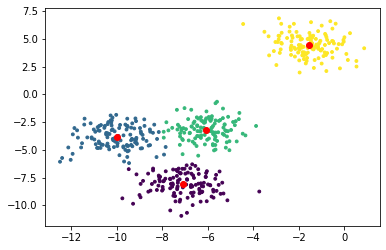

In [15]:
curr_group, SSE_list, centers = Kmeans_regular(data, k = 4)
plt.scatter(X[:, 0], X[:, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=curr_group
           )
plt.scatter(centers.iloc[:, 0], centers.iloc[:, 1], c = 'red')   

In [ ]:
# 那这里我们就证明了之前我们写的算法是正确的。
# 我们尝试用sklearn的kmeans来实现一遍

In [ ]:
# 查看选什么n最好，n从1到10，看一下得出的SSE趋势



In [ ]:
# 尝试使用轮廓系数来查看
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [ ]:
# 给出所有样本点的轮廓系数的均值
silhouette_score(X, y_pred)
silhouette_score(X, cluster.labels_)

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


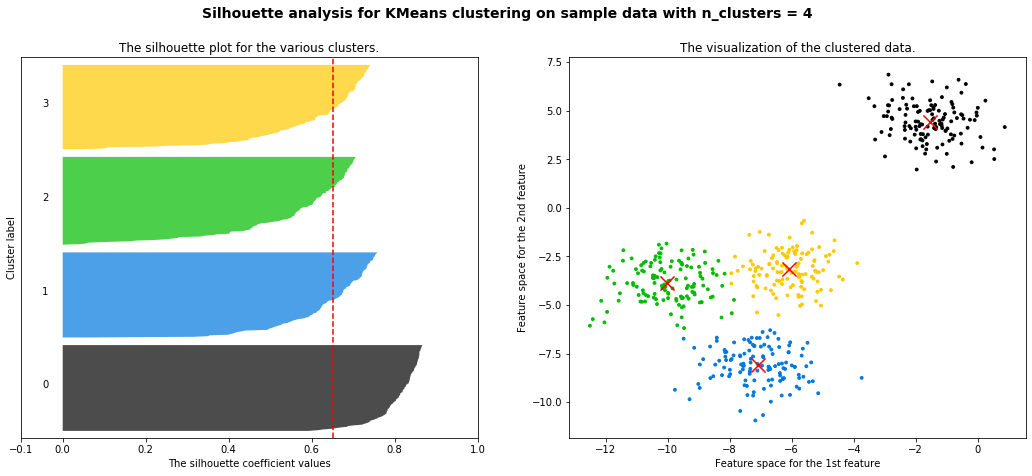

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#先设定我们要分成的簇数
n_clusters = 4

#创建一个画布，画布上共有一行两列两个图
fig, (ax1, ax2) = plt.subplots(1, 2)

#画布尺寸
fig.set_size_inches(18, 7)

# 第一个图是我们的轮廓系数图像，是由各个簇的轮廓系数组成的横向条形图
# 横向条形图的横坐标是我们的轮廓系数取值，纵坐标是我们的每个样本，因为轮廓系数是对于每一个样本进行计算的

# 首先我们来设定横坐标
# 轮廓系数的取值范围在[-1,1]之间，但我们至少是希望轮廓系数要大于0的
# 太长的横坐标不利于我们的可视化，所以只设定X轴的取值在[-0.1,1]之间
ax1.set_xlim([-0.1, 1])

# 接下来设定纵坐标，通常来说，纵坐标是从0开始，最大值取到X.shape[0]的取值
# 但我们希望，每个簇能够排在一起，不同的簇之间能够有一定的空隙
# 以便我们看到不同的条形图聚合成的块，理解它是对应了哪一个簇
# 因此我们在设定纵坐标的取值范围的时候，在X.shape[0]上，加上一个距离(n_clusters + 1) * 10，留作间隔用
ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

# 开始建模，调用聚类好的标签
clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
cluster_labels = clusterer.labels_

# 调用轮廓系数分数，注意，silhouette_score生成的是所有样本点的轮廓系数均值
# 两个需要输入的参数是，特征矩阵X和聚类完毕后的标签
silhouette_avg = silhouette_score(X, cluster_labels)
#用print来报一下结果，现在的簇数量下，整体的轮廓系数究竟有多少
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# 调用silhouette_samples，返回每个样本点的轮廓系数，这就是我们的横坐标
sample_silhouette_values = silhouette_samples(X, cluster_labels)

#设定y轴上的初始取值
y_lower = 10

#接下来，对每一个簇进行循环
for i in range(n_clusters):
    # 从每个样本的轮廓系数结果中抽取出第i个簇的轮廓系数，并对他进行排序
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    
    #注意, .sort()这个命令会直接改掉原数据的顺序
    ith_cluster_silhouette_values.sort()
    
    #查看这一个簇中究竟有多少个样本
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    
    #这一个簇在y轴上的取值，应该是由初始值(y_lower)开始，到初始值+加上这个簇中的样本数量结束(y_upper)
    y_upper = y_lower + size_cluster_i
    
    #colormap库中的，使用小数来调用颜色的函数
    #在nipy_spectral([输入任意小数来代表一个颜色])
    #在这里我们希望每个簇的颜色是不同的，我们需要的颜色种类刚好是循环的个数的种类
    #在这里，只要能够确保，每次循环生成的小数是不同的，可以使用任意方式来获取小数
    #在这里，我是用i的浮点数除以n_clusters，在不同的i下，自然生成不同的小数
    #以确保所有的簇会有不同的颜色
    color = cm.nipy_spectral(float(i)/n_clusters)
    
    #开始填充子图1中的内容
    #fill_between是填充曲线与直角之间的空间的函数
    #fill_betweenx的直角是在纵坐标上
    #fill_betweeny的直角是在横坐标上
    #fill_betweenx的参数应该输入(定义曲线的点的横坐标，定义曲线的点的纵坐标，柱状图的颜色)
    ax1.fill_betweenx(np.arange(y_lower, y_upper)
                      ,ith_cluster_silhouette_values
                      ,facecolor=color
                      ,alpha=0.7
                     )

    #为每个簇的轮廓系数写上簇的编号，并且让簇的编号显示坐标轴上每个条形图的中间位置
    #text的参数为(要显示编号的位置的横坐标，要显示编号的位置的纵坐标，要显示的编号内容)
    ax1.text(-0.05
             , y_lower + 0.5 * size_cluster_i
             , str(i))

    # 为下一个簇计算新的y轴上的初始值，是每一次迭代之后，y的上线再加上10
    #以此来保证，不同的簇的图像之间显示有空隙
    y_lower = y_upper + 10
    
#给图1加上标题，横坐标轴，纵坐标轴的标签
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

#把整个数据集上的轮廓系数的均值以虚线的形式放入我们的图中
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#让y轴不显示任何刻度
ax1.set_yticks([])

#让x轴上的刻度显示为我们规定的列表
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#开始对第二个图进行处理，首先获取新颜色，由于这里没有循环，因此我们需要一次性生成多个小数来获取多个颜色
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

ax2.scatter(X[:, 0], X[:, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=colors
           )

#把生成的质心放到图像中去
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
            c="red", alpha=1, s=200)

#为图二设置标题，横坐标标题，纵坐标标题
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

#为整个图设置标题
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


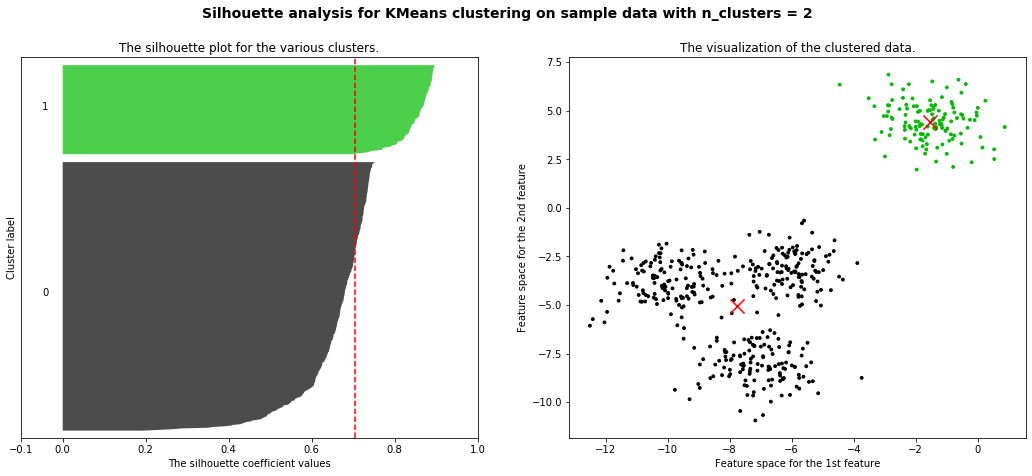

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


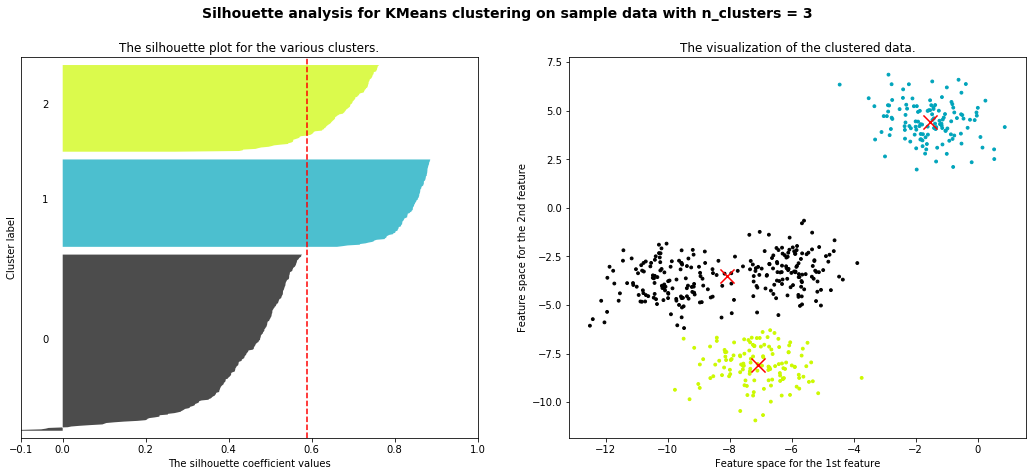

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


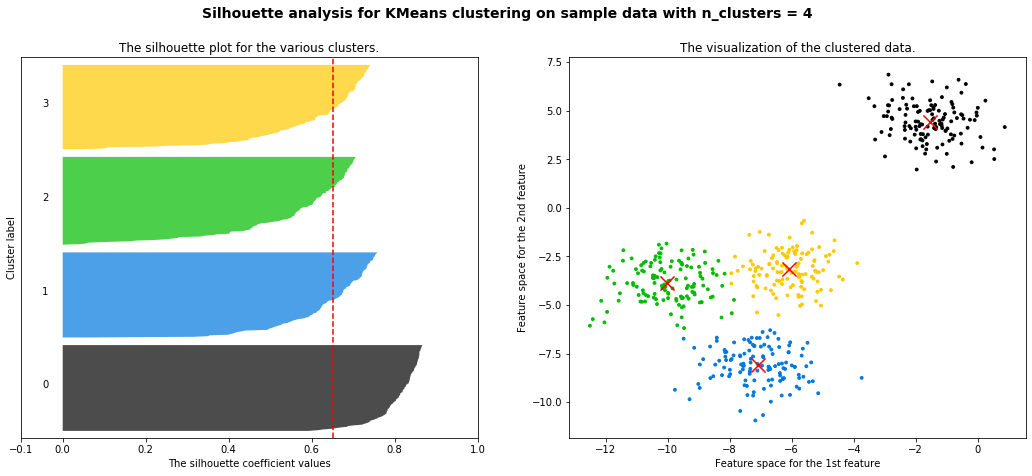

For n_clusters = 5 The average silhouette_score is : 0.5745566973301872


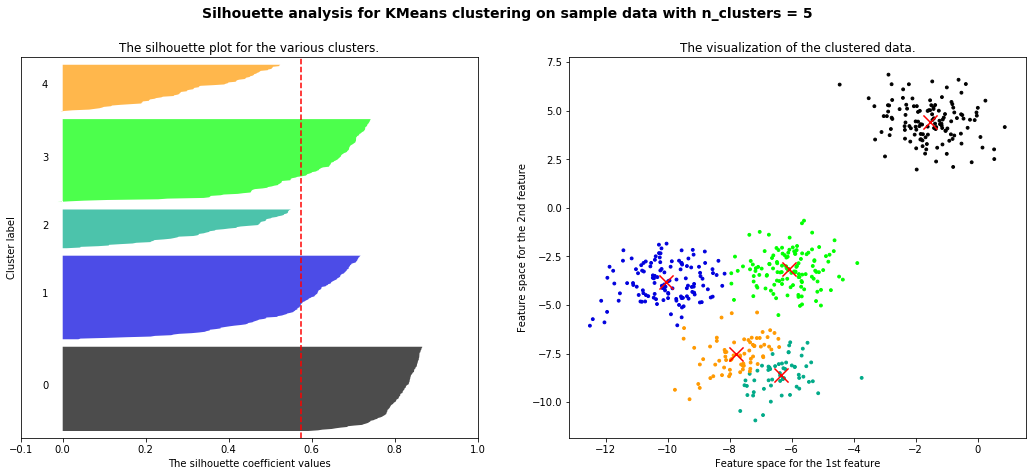

For n_clusters = 6 The average silhouette_score is : 0.4387644975296138


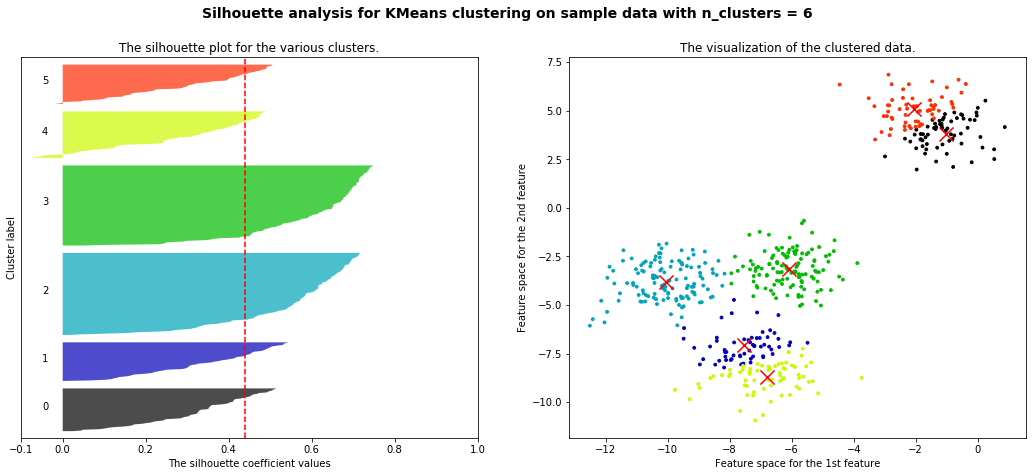

For n_clusters = 7 The average silhouette_score is : 0.3728615111052894


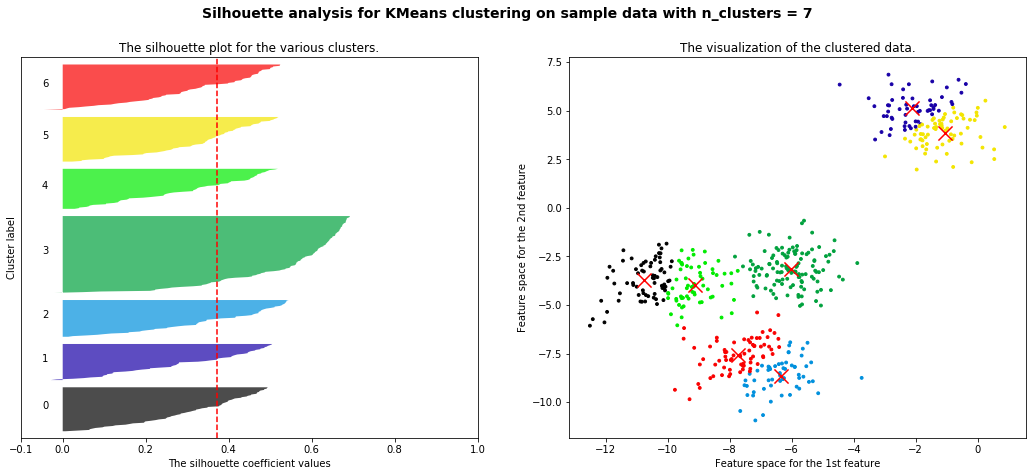

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor=color
                          ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1]
                ,marker='o'
                ,s=8
                ,c=colors
               )
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="red", alpha=1, s=200)
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [ ]:
# 随机初始质心点



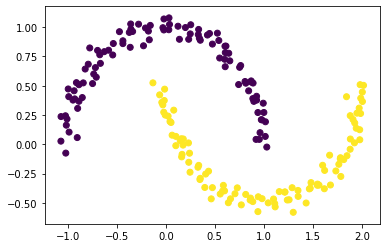

In [20]:
# DBSCAN

from sklearn.datasets import make_moons
X,y = make_moons(200, noise = 0.05, random_state=0)
plt.scatter(X[:,0],X[:,1], c=y)

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

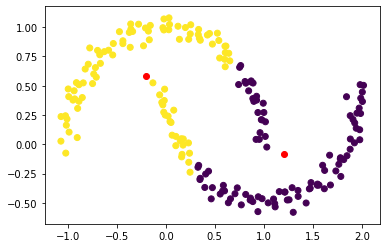

In [22]:
centers = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_)
plt.plot(centers[:,0], centers[:,1],'ro')

In [23]:
# 使用DBSCAN